# Testing with Postgres on Google cloud


See https://jira.lsstcorp.org/browse/DM-18007 for details of this setup.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']

## First test in fork mode (mostly)
Very first test is done in fork mode, with 15x15 tiling on a single 64-core client machine. It also includes small number of events which ran in MPI mode, again on a single 64-code machine, just for comparison with fork:
- events 1-11000 are all in for mode
- events 11001-11100 are in MPI mode
- events 11101-11200 are in MPI mode, with large memory configuration on server

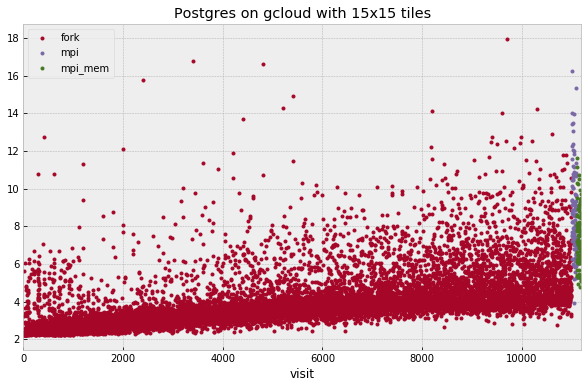

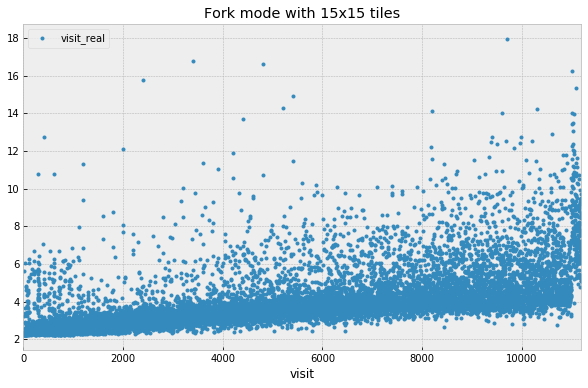

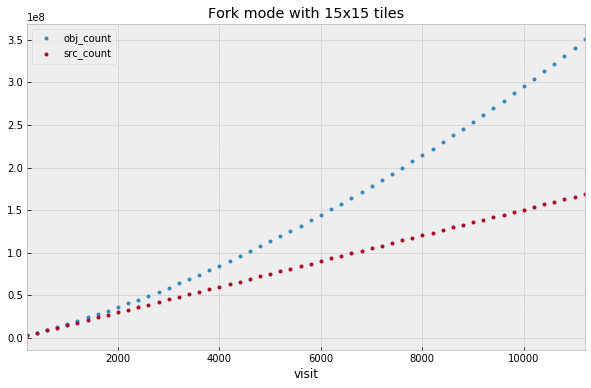

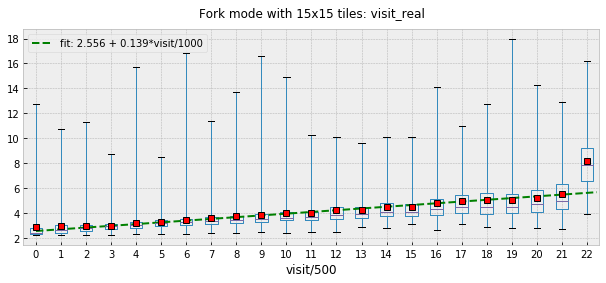

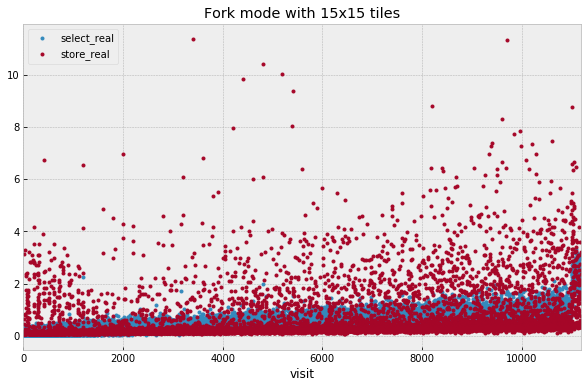

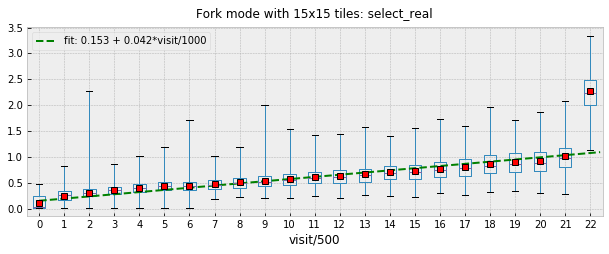

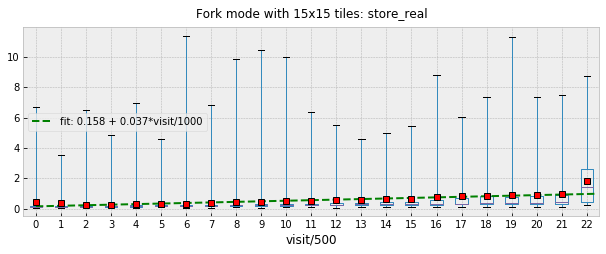

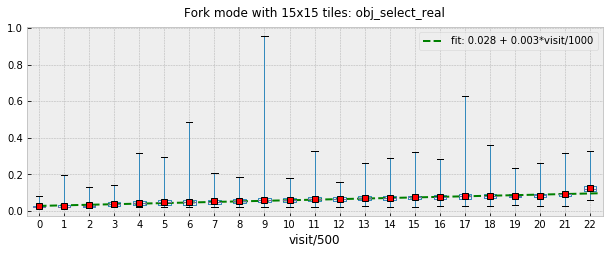

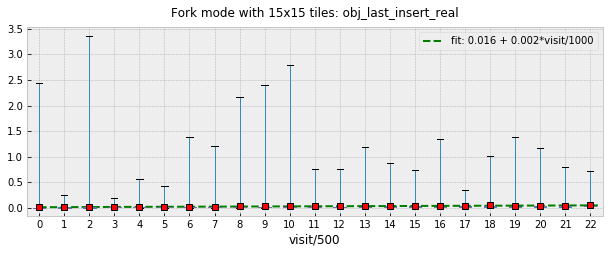

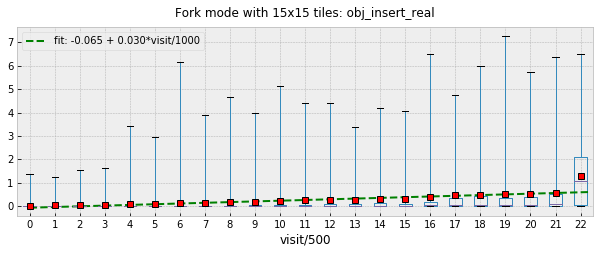

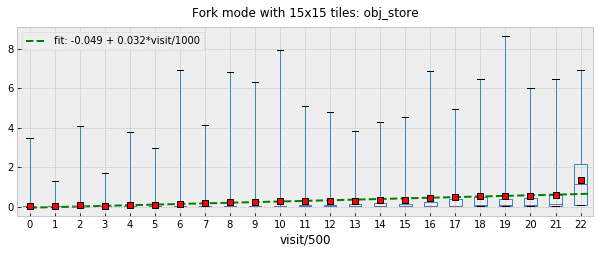

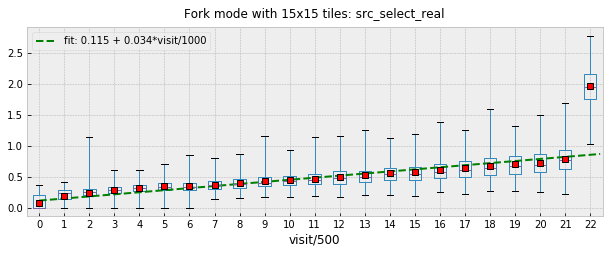

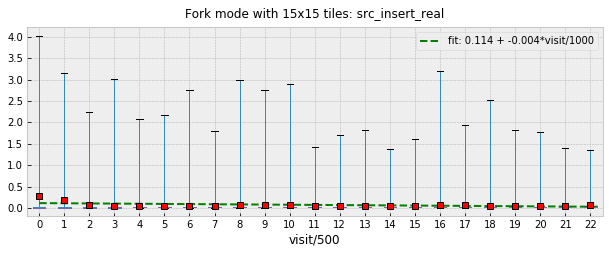

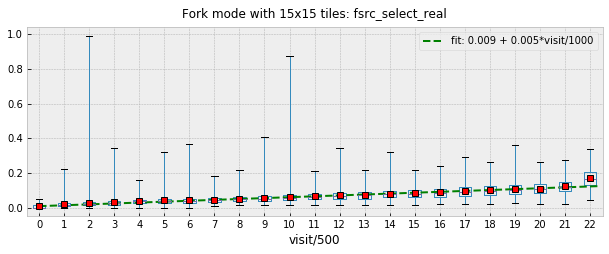

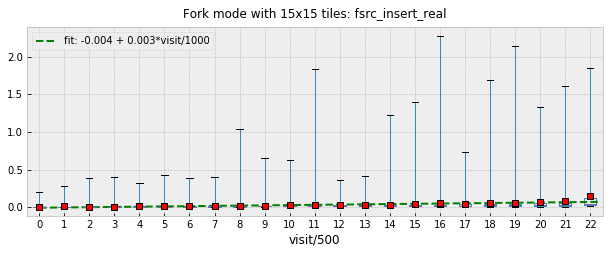

In [7]:
csv = "data/dm-17654-gcloud-pg-fork-15x15.csv.gz"
ds, dsc = plots._read_csv(csv)
ds_fork = ds[ds.index<=11000]
ds_mpi = ds[(ds.index>11000) & (ds.index<=11100)]
ds_mpi2 = ds[(ds.index>11100)]

ax = ds_fork.plot(y=["visit_real"], style=['.C1'], title="Postgres on gcloud with 15x15 tiles", figsize=(10,6));
ds_mpi.plot(y=["visit_real"], style=['.C2'], ax=ax);
ds_mpi2.plot(y=["visit_real"], style=['.C3'], ax=ax);
ax.legend(['fork', 'mpi', 'mpi_mem'])

title = "Fork mode with 15x15 tiles"
plots.do_plots(csv, title, bin=500, filter_count=True)
plots.do_plots_all(ds, title, bin=500, filter_count=True, plots=all_plots);

It looks like in MPI mode it runs slower, I guess there is too much contention on single machine, maybe we need couple more machies on client side to 